In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc, rcParams

### Setting plot parameters

In [2]:
fontsize = 35
labelsize = 35


rc("xtick", labelsize=fontsize)
rc("ytick", labelsize=fontsize)
rcParams["axes.linewidth"] = 5.3
rcParams["xtick.major.width"] = 5.3
rcParams["xtick.minor.width"] = 5.3
rcParams["ytick.major.width"] = 5.3
rcParams["ytick.minor.width"] = 5.3
rcParams["xtick.major.size"] = 12.5
rcParams["xtick.minor.size"] = 6.5
rcParams["ytick.major.size"] = 12.5
rcParams["ytick.minor.size"] = 6.5

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50,
        }


cmap = plt.get_cmap('gnuplot2')
color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors = [cmap(value) for value in color_values]

### Loading data

In [5]:
photoz_table = pd.read_csv("tables_photometric/Hydra_iDR4_morecolumns.csv", usecols=['RA_1', 'DEC_1', 'zml', 'odds', 
                                                                       'PROB_GAL', 'r_petro', 'g_petro', 'u_petro'])

In [6]:
ra_pz = photoz_table["RA_1"]
dec_pz = photoz_table["DEC_1"]
zml = photoz_table["zml"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]
r_petro = photoz_table["r_petro"]
g_petro = photoz_table["g_petro"]
u_petro = photoz_table["u_petro"]

In [7]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances = dist(ra_pz, dec_pz)

### Maybe we will have to revisit this, because there is no clear separation of galaxy colors

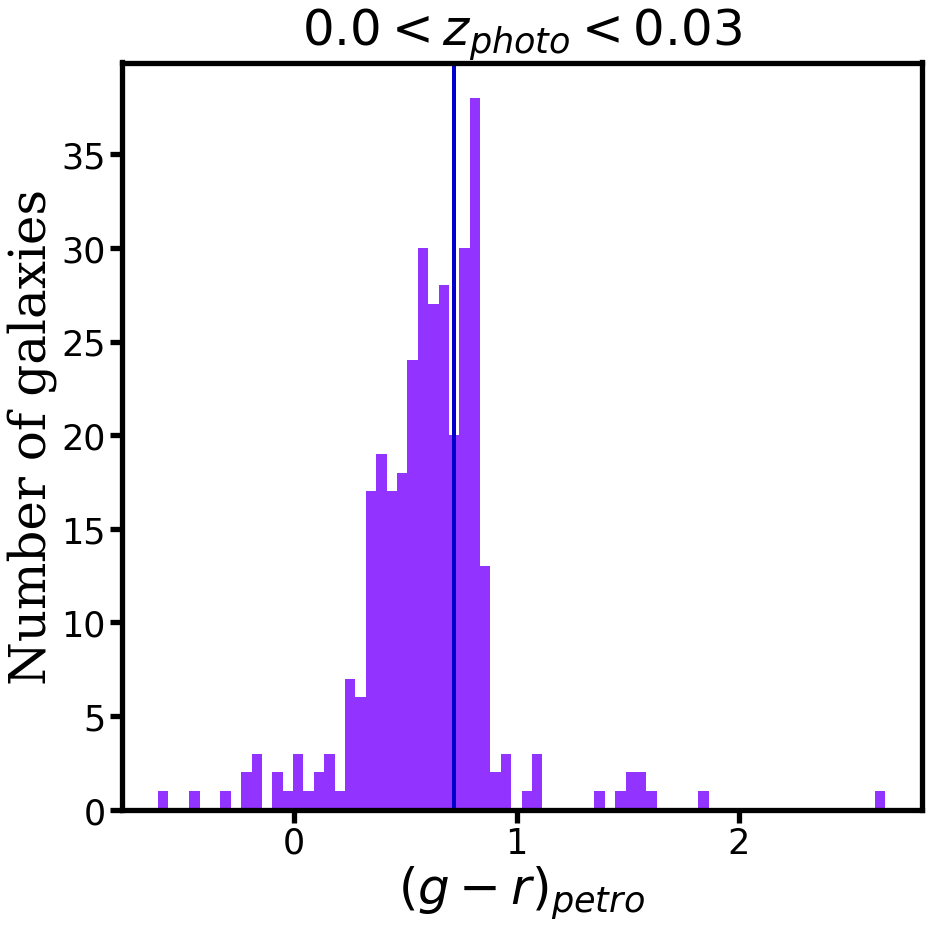

In [33]:
#Division of colours
division = 0.72

mlim = 19

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)
  
mask = (distances < radius) & (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.03) & (r_petro <
                      mlim) & ((g_petro - r_petro) < 3) & ((g_petro - r_petro) > -1)

ax.hist((g_petro - r_petro)[mask], bins=70, color=colors[3], histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontdict=font)
ax.set_xlabel(r"$(g-r)_{petro}$", fontdict=font)
ax.set_title(r"$0.0 < z_{photo} < 0.03$", fontdict=font)
ax.axvline(division, color=colors[1], lw=4)

# ax.yaxis.set_tick_params(labelsize=20, width=3)
# ax.xaxis.set_tick_params(labelsize=20, width=3)

# ax.grid()
    
fig.tight_layout()
plt.savefig("../Figures/Dissertation/color-distribution_g-r-v2_photoz0.03.png", format='png')

In [58]:
mask = (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.1) & (r_petro < 19)

print(np.sum(mask))
print(np.sum((g_petro - r_petro)[mask] > 0.535))
print(np.sum((g_petro - r_petro)[mask] < 0.535))

10875
6833
4042


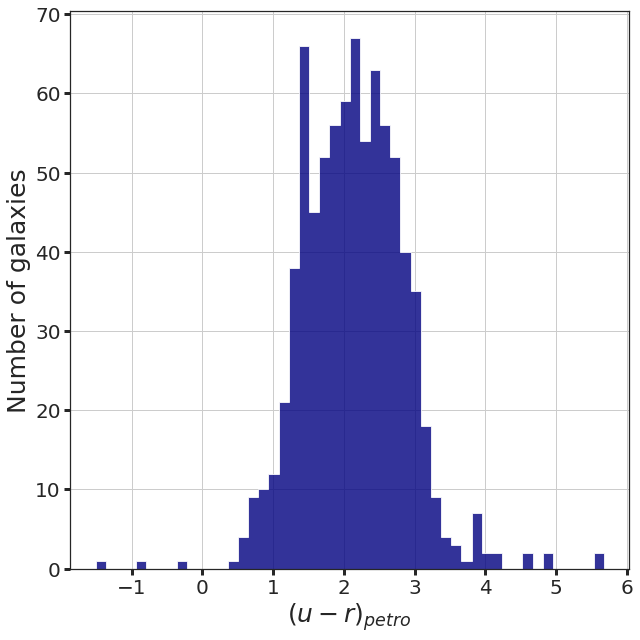

In [88]:
mlim = 19

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
  
mask = (distances < radius) & (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.1) & (r_petro < mlim) & ((u_petro - r_petro) < 40)
 
ax.hist((u_petro - r_petro)[mask], bins=50, color='navy', histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontsize=25)
ax.set_xlabel(r"$(u-r)_{petro}$", fontsize=25)

ax.yaxis.set_tick_params(labelsize=20, width=3)
ax.xaxis.set_tick_params(labelsize=20, width=3)

ax.grid()
    
fig.tight_layout()
# plt.savefig("../Presentations/cosmo22-splus-poster/color-distribution_u-r.png", format='png')